<a href="https://colab.research.google.com/github/JasmithaM14/NLP_CW2/blob/main/NLP_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
pip install matplotlib


Load and Processing data

In [10]:
import pandas as pd

# Load merged data
data_path = '/content/drive/MyDrive/CW2/Merged/'
training_byarticle = pd.read_csv(data_path + 'merged_training_byarticle.csv')
training_bypublisher = pd.read_csv(data_path + 'merged_training_bypublisher.csv')
validation_bypublisher = pd.read_csv(data_path + 'merged_validation_bypublisher.csv')

# Print summaries to check the data
print("Training by Article Data Summary:")
print(training_byarticle.head())
print("\nTraining by Publisher Data Summary:")
print(training_bypublisher.head())
print("\nValidation by Publisher Data Summary:")
print(validation_bypublisher.head())


Training by Article Data Summary:
   article_id  from  flickrcom  money  mid  image  by  k  permission  details  \
0           0    16          2     35    2      2   5  2           2        2   
1           2     4          0      0    0      0   2  0           0        0   
2           4     4          0      0    0      0   6  0           0        0   
3           5    11          0      0    4      0  12  0           0        5   
4           6     4          0      0    0      0   4  0           0        0   

   ...  bama  presidenttrump  screeching  provably  tranquilizers  underpaid  \
0  ...     0               0           0         0              0          0   
1  ...     0               0           0         0              0          0   
2  ...     0               0           0         0              0          0   
3  ...     0               0           0         0              0          0   
4  ...     0               0           0         0              0          0   

Tokenization

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
training_byarticle = pd.read_csv('/content/drive/MyDrive/CW2/Merged/merged_training_byarticle.csv')
training_bypublisher = pd.read_csv('/content/drive/MyDrive/CW2/Merged/merged_training_bypublisher.csv')
validation_bypublisher = pd.read_csv('/content/drive/MyDrive/CW2/Merged/merged_validation_bypublisher.csv')

# Define maximum number of words and maximum sequence length
max_words = 10000
max_len = 150

# Combine texts from both training datasets
texts = training_byarticle.drop(columns=['article_id', 'label_y']).astype(str).agg(' '.join, axis=1).tolist() + \
        training_bypublisher.drop(columns=['article_id', 'label_y']).astype(str).agg(' '.join, axis=1).tolist()

# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences and pad them
sequences_byarticle = tokenizer.texts_to_sequences(training_byarticle.drop(columns=['article_id', 'label_y']).astype(str).agg(' '.join, axis=1).tolist())
padded_byarticle = pad_sequences(sequences_byarticle, maxlen=max_len)

sequences_bypublisher = tokenizer.texts_to_sequences(training_bypublisher.drop(columns=['article_id', 'label_y']).astype(str).agg(' '.join, axis=1).tolist())
padded_bypublisher = pad_sequences(sequences_bypublisher, maxlen=max_len)

validation_sequences = tokenizer.texts_to_sequences(validation_bypublisher.drop(columns=['article_id', 'label_y']).astype(str).agg(' '.join, axis=1).tolist())
padded_validation = pad_sequences(validation_sequences, maxlen=max_len)

# Prepare labels
y_train_byarticle = training_byarticle['label_y'].values
y_train_bypublisher = training_bypublisher['label_y'].values
y_val = validation_bypublisher['label_y'].values

print("Tokenization and Text Vectorization complete.")


Tokenization and Text Vectorization complete.


LSTM Model

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 544ms/step - accuracy: 0.6554 - loss: 0.6683 - val_accuracy: 0.4940 - val_loss: 0.7134
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 542ms/step - accuracy: 0.6251 - loss: 0.6645 - val_accuracy: 0.4940 - val_loss: 0.7301
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 503ms/step - accuracy: 0.6247 - loss: 0.6632 - val_accuracy: 0.4947 - val_loss: 0.7450
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 543ms/step - accuracy: 0.6447 - loss: 0.6541 - val_accuracy: 0.4947 - val_loss: 0.7172
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 422ms/step - accuracy: 0.6530 - loss: 0.6511 - val_accuracy: 0.4947 - val_loss: 0.7299
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 500ms/step - accuracy: 0.6165 - loss: 0.6673 - val_accuracy: 0.4947 - val_loss: 0.7332
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 542ms/step - accuracy: 0.6470 - loss: 0.6487 - val_accuracy: 0.4947 - val_loss: 0.7104
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 407ms/step - accuracy: 0.6345 - loss: 0.6589 - val_accu

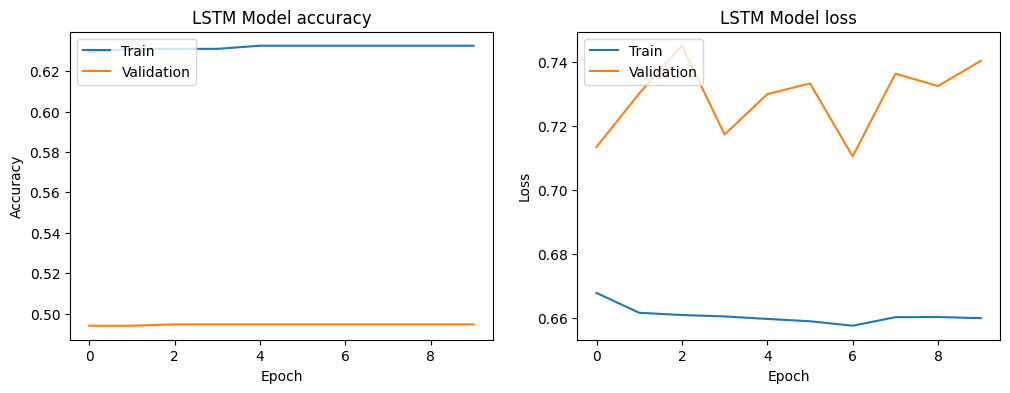

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming 'padded_byarticle' and 'padded_validation' are already prepared

# Define LSTM model architecture
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
lstm_model.summary()

# Train the model
lstm_history = lstm_model.fit(
    padded_byarticle, y_train_byarticle,
    epochs=10,
    batch_size=32,
    validation_data=(padded_validation, y_val)
)

# Evaluate the model on validation set
lstm_loss, lstm_accuracy = lstm_model.evaluate(padded_validation, y_val)
print(f"LSTM Model - Validation Loss: {lstm_loss}")
print(f"LSTM Model - Validation Accuracy: {lstm_accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

BERT

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
21/21 [==============================] - 182s 6s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
21/21 [==============================] - 86s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
47/47 [==============================] - 28s 602ms/step - loss: 0.0000e+00 - accuracy: 1.0000
BERT Model - Validation Loss: 0.0
BERT Model - Validation Accuracy: 1.0


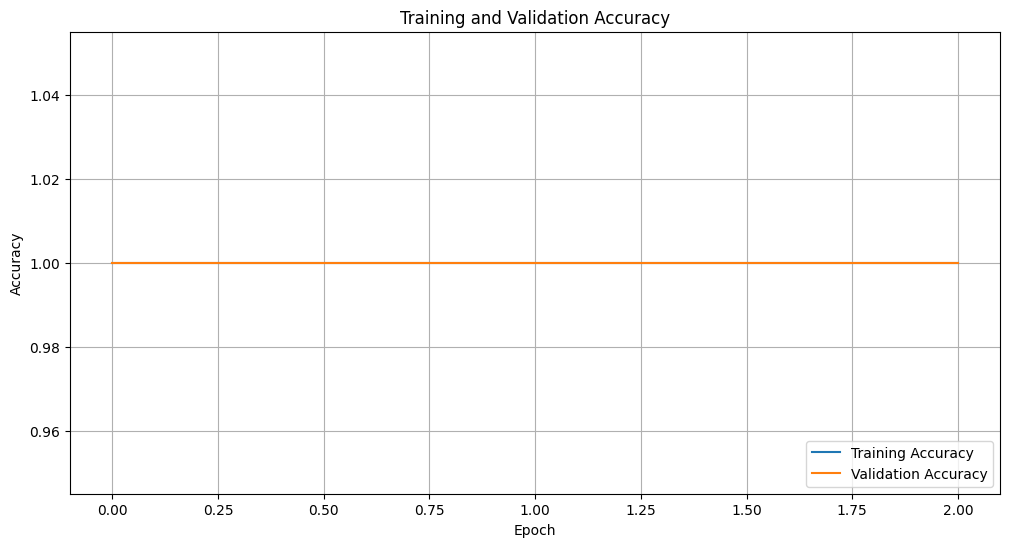

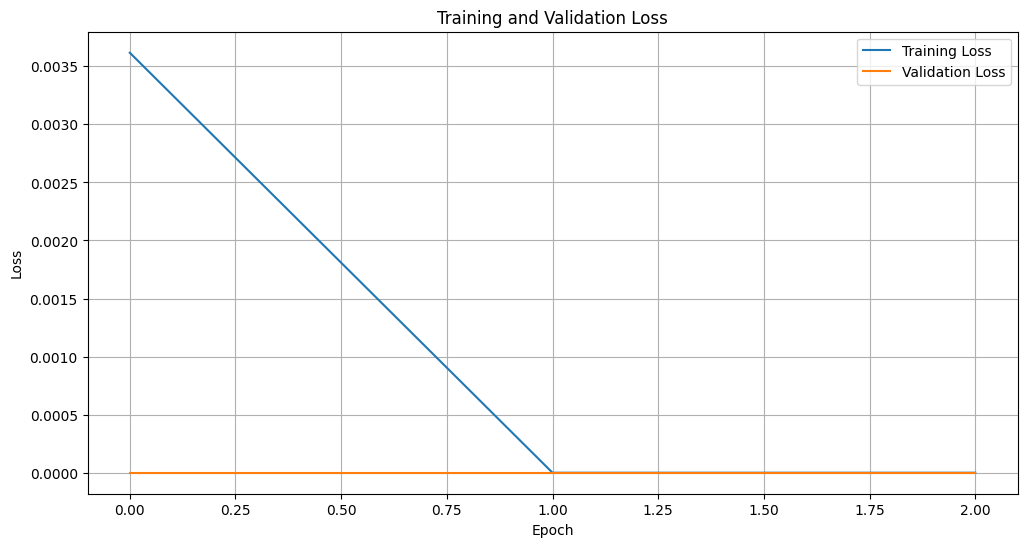

In [9]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


# Define model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
# Set num_labels to match the number of classes in your data
# Assuming binary classification (true/false)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=1)

# Assuming 'max_len' is defined somewhere before
max_len = 150 # Or whatever value you have

# Use the correct column name for text data, assume 'cleaned_text' column
# If your data frame doesn't have 'cleaned_text', replace it with the correct column name
train_texts = training_byarticle['article_id'].astype(str).tolist()
val_texts = validation_bypublisher['article_id'].astype(str).tolist()

# Tokenize the text data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_len)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_len)

# Prepare labels, handling NaN values
y_train_byarticle = training_byarticle['label_y'].map({'true': 1, 'false': 0}).fillna(0).values  # Replace NaN with 0
y_val = validation_bypublisher['label_y'].map({'true': 1, 'false': 0}).fillna(0).values  # Replace NaN with 0

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train_byarticle
)).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    y_val
)).batch(32)

# Compile and train the model
# Use BinaryCrossentropy without from_logits=True for single output
bert_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

bert_history = bert_model.fit(train_dataset, validation_data=val_dataset, epochs=3)

# Evaluate the model
bert_loss, bert_accuracy = bert_model.evaluate(val_dataset)
print(f"BERT Model - Validation Loss: {bert_loss}")
print(f"BERT Model - Validation Accuracy: {bert_accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(bert_history.history['accuracy'], label='Training Accuracy')
plt.plot(bert_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(bert_history.history['loss'], label='Training Loss')
plt.plot(bert_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


RNN

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
21/21 [==============================] - 5s 145ms/step - loss: 0.2830 - accuracy: 0.8992 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 2/10
21/21 [==============================] - 3s 159ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0

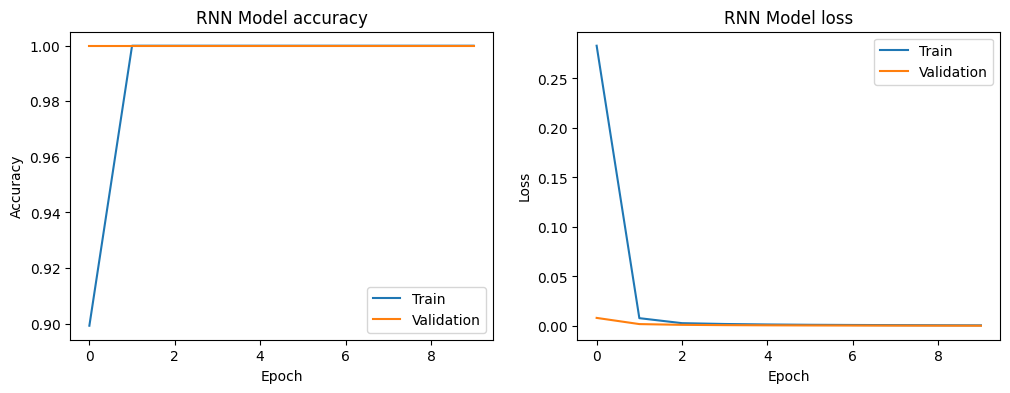

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# Assuming 'padded_byarticle' and 'padded_validation' are already prepared
# and 'y_train_byarticle' and 'y_val' contain the corresponding labels

# Define RNN model architecture
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
rnn_model.summary()

# Train the model
rnn_history = rnn_model.fit(
    padded_byarticle, y_train_byarticle,
    epochs=10,
    batch_size=32,
    validation_data=(padded_validation, y_val)
)

# Evaluate the model on validation set
rnn_loss, rnn_accuracy = rnn_model.evaluate(padded_validation, y_val)
print(f"RNN Model - Validation Loss: {rnn_loss}")
print(f"RNN Model - Validation Accuracy: {rnn_accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()
